In [ ]:
import pandas as pd

import numpy as np
import pandas as pd 
import scipy as stats
#importing ML models from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA,QDA
import matplotlib.pyplot as plt
import seaborn as sns


import time
#Importing metrics functions from SK Learn
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #For encoding categorical variables

In [ ]:
df_spirit = pd.read_csv("https://raw.githubusercontent.com/nadeeem98/Alcohol-Data/main/spirits_data.csv",index_col=0)

In [ ]:
df_spirit.head()

,Name,Country,Brand,Categories,Tasting Notes,ABV,Base Ingredient,Years Aged,Rating,Rate Count,Price,Volume,Description
0,Dekuyper Triple Sec Liqueur,United States,DeKuyper Liqueur,"Citrus, Triple Sec Liqueur, Liqueur",NaN,24%,NaN,NaN,5.0,187,$10.99,NaN,DeKuyper® Triple Sec Cordial brings the essenc...
1,DeKuyper Peachtree Schnapps Liqueur,United States,DeKuyper Liqueur,Liqueur,NaN,20%,NaN,NaN,4.8,79,$11.69,NaN,DeKuyper® Peachtree® Schnapps Liqueur brings r...
2,DeKuyper Sour Apple Pucker Schnapps Liqueur,United States,DeKuyper Liqueur,Liqueur,NaN,15%,NaN,NaN,5.0,47,$11.99,NaN,DeKuyper® Pucker® Sour Apple Schnapps Liqueur ...
3,DeKuyper Blue Curacao Liqueur,United States,DeKuyper Liqueur,Liqueur,NaN,24%,NaN,NaN,5.0,35,$11.99,NaN,"Elementary and world famous, DeKuyper® Blue Cu..."
4,DeKuyper Buttershots Schnapps Liqueur,United States,DeKuyper Liqueur,Liqueur,NaN,15%,NaN,NaN,4.8,35,$12.99,NaN,DeKuyper® Buttershots™ Schnapps Liqueur is car...


In [ ]:
df_spirit.isnull().sum()/len(df_spirit)

Name               0.000000
Country            0.002564
Brand              0.000000
Categories         0.001010
Tasting Notes      0.853213
ABV                0.179734
Base Ingredient    0.901935
Years Aged         0.885772
Rating             0.000000
Rate Count         0.000000
Price              0.023312
Volume             0.995648
Description        0.225348
dtype: float64

Remove Volume and Description variables

In [ ]:
newdf_spirit = df_spirit[['Name', 'Country', 'Brand', 'Categories', 'Tasting Notes',
       'ABV','Rating', 'Rate Count', 'Price']]

In [ ]:
newdf_spirit.head()

,Name,Country,Brand,Categories,Tasting Notes,ABV,Rating,Rate Count,Price
0,Dekuyper Triple Sec Liqueur,United States,DeKuyper Liqueur,"Citrus, Triple Sec Liqueur, Liqueur",NaN,24%,5.0,187,$10.99
1,DeKuyper Peachtree Schnapps Liqueur,United States,DeKuyper Liqueur,Liqueur,NaN,20%,4.8,79,$11.69
2,DeKuyper Sour Apple Pucker Schnapps Liqueur,United States,DeKuyper Liqueur,Liqueur,NaN,15%,5.0,47,$11.99
3,DeKuyper Blue Curacao Liqueur,United States,DeKuyper Liqueur,Liqueur,NaN,24%,5.0,35,$11.99
4,DeKuyper Buttershots Schnapps Liqueur,United States,DeKuyper Liqueur,Liqueur,NaN,15%,4.8,35,$12.99


In [ ]:
check = newdf_spirit.dropna()

In [ ]:
check.describe()

,index,Rating,Rate Count,Price
count,1824.000000,1824.000000,1824.000000,1824.000000
mean,6388.908443,4.969463,6.360197,78.765450
std,3291.533076,0.205237,34.209050,522.859541
min,66.000000,2.500000,1.000000,0.000000
25%,3939.750000,5.000000,1.000000,15.990000
50%,6473.500000,5.000000,1.000000,30.995000
75%,9025.250000,5.000000,1.000000,49.990000
max,12817.000000,5.000000,857.000000,14947.360000


In [ ]:
import re

p = '[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
A=[]

for prices in check.Price.tolist():
  for catch in re.finditer(p,prices):
    A.append(float(catch[0]))

In [ ]:
check.reset_index(inplace=True)

In [ ]:
Price=pd.DataFrame(A)
Price["Price"]=Price[0]
del(Price[0])
del(check["Price"])
check=pd.concat([check,Price],axis=1)

In [ ]:
check.head()

,index,Name,Country,Brand,Categories,Tasting Notes,ABV,Rating,Rate Count,Price
0,66,BACARDÍ Superior White Rum,Puerto Rico,Bacardi Rum,"Rum, White Rum","Floral, Fruity, Light, Oak, Smooth, Vanilla",40%,4.9,761,15.39
1,67,BACARDÍ Gold Rum,Puerto Rico,Bacardi Rum,"Gold Rum, Rum","Banana, Butter, Caramel, Citrus, Oak, Rich, To...",40%,4.8,170,23.99
2,68,BACARDÍ Black Rum,Puerto Rico,Bacardi Rum,"Dark Rum, Rum","Caramel, Smoky, Sweet, Tropical Fruit, Vanilla",40%,4.6,52,14.99
3,69,BACARDÍ Limón Flavored White Rum,Puerto Rico,Bacardi Rum,"Flavored Rum, Rum","Citrus, Fresh, Fruity, Grapefruit",35%,5.0,44,23.36
4,70,BACARDÍ Coquito Coconut Cream Liqueur,Puerto Rico,Bacardi Rum,"Cream Liqueur, Liqueur",Creamy,13%,4.8,45,19.99


In [ ]:
import re

p = '[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
A=[]

for prices in check.ABV.tolist():
  for catch in re.finditer(p,prices):
    A.append(float(catch[0]))





B=[]
for val in A:
    B.append(val/100)




Price=pd.DataFrame(B)
Price["ABV"]=Price[0]
del(Price[0])
del(check["ABV"])
check=pd.concat([check,Price],axis=1)

In [ ]:
check.head()

,index,Name,Country,Brand,Categories,Tasting Notes,Rating,Rate Count,Price,ABV
0,66,BACARDÍ Superior White Rum,Puerto Rico,Bacardi Rum,"Rum, White Rum","Floral, Fruity, Light, Oak, Smooth, Vanilla",4.9,761,15.39,0.40
1,67,BACARDÍ Gold Rum,Puerto Rico,Bacardi Rum,"Gold Rum, Rum","Banana, Butter, Caramel, Citrus, Oak, Rich, To...",4.8,170,23.99,0.40
2,68,BACARDÍ Black Rum,Puerto Rico,Bacardi Rum,"Dark Rum, Rum","Caramel, Smoky, Sweet, Tropical Fruit, Vanilla",4.6,52,14.99,0.40
3,69,BACARDÍ Limón Flavored White Rum,Puerto Rico,Bacardi Rum,"Flavored Rum, Rum","Citrus, Fresh, Fruity, Grapefruit",5.0,44,23.36,0.35
4,70,BACARDÍ Coquito Coconut Cream Liqueur,Puerto Rico,Bacardi Rum,"Cream Liqueur, Liqueur",Creamy,4.8,45,19.99,0.13


In [ ]:
A=[]
for i in list(check["Categories"]):
    if "Rum" in i:
        A.append("Rum")
    elif "Whiskey" in i:
        A.append("Whiskey")
    elif "Brandy" in i:
        A.append("Brandy")
    elif "Vodka" in i:
        A.append("Vodka")    
    else:
        A.append('Other')
        
A=pd.DataFrame(A)
Spirit=pd.DataFrame(A)
Spirit["Type of Spirit"]=Spirit[0]
del(Spirit[0])
check=pd.concat([check,Spirit],axis=1)
del(check["Categories"])

In [ ]:
check.head()

,index,Name,Country,Brand,Tasting Notes,Rating,Rate Count,Price,ABV,Type of Spirit
0,66,BACARDÍ Superior White Rum,Puerto Rico,Bacardi Rum,"Floral, Fruity, Light, Oak, Smooth, Vanilla",4.9,761,15.39,0.40,Rum
1,67,BACARDÍ Gold Rum,Puerto Rico,Bacardi Rum,"Banana, Butter, Caramel, Citrus, Oak, Rich, To...",4.8,170,23.99,0.40,Rum
2,68,BACARDÍ Black Rum,Puerto Rico,Bacardi Rum,"Caramel, Smoky, Sweet, Tropical Fruit, Vanilla",4.6,52,14.99,0.40,Rum
3,69,BACARDÍ Limón Flavored White Rum,Puerto Rico,Bacardi Rum,"Citrus, Fresh, Fruity, Grapefruit",5.0,44,23.36,0.35,Rum
4,70,BACARDÍ Coquito Coconut Cream Liqueur,Puerto Rico,Bacardi Rum,Creamy,4.8,45,19.99,0.13,Other


In [ ]:
#categorizing the price
bin_labels_5 = ['Cheap', 'Expensive']
check['Price_Category'] = pd.qcut(check['Price'],
                              q=[0,  .5,1],
                              labels=bin_labels_5)
check.head()

,index,Name,Country,Brand,Tasting Notes,Rating,Rate Count,Price,ABV,Type of Spirit,Price_Category
0,66,BACARDÍ Superior White Rum,Puerto Rico,Bacardi Rum,"Floral, Fruity, Light, Oak, Smooth, Vanilla",4.9,761,15.39,0.40,Rum,Cheap
1,67,BACARDÍ Gold Rum,Puerto Rico,Bacardi Rum,"Banana, Butter, Caramel, Citrus, Oak, Rich, To...",4.8,170,23.99,0.40,Rum,Cheap
2,68,BACARDÍ Black Rum,Puerto Rico,Bacardi Rum,"Caramel, Smoky, Sweet, Tropical Fruit, Vanilla",4.6,52,14.99,0.40,Rum,Cheap
3,69,BACARDÍ Limón Flavored White Rum,Puerto Rico,Bacardi Rum,"Citrus, Fresh, Fruity, Grapefruit",5.0,44,23.36,0.35,Rum,Cheap
4,70,BACARDÍ Coquito Coconut Cream Liqueur,Puerto Rico,Bacardi Rum,Creamy,4.8,45,19.99,0.13,Other,Cheap


In [ ]:
check.isnull().sum()

index             0
Name              0
Country           0
Brand             0
Tasting Notes     0
Rating            0
Rate Count        0
Price             0
ABV               0
Type of Spirit    0
Price_Category    0
dtype: int64

In [ ]:
y = check["Price_Category"]
x = check.drop(["Price","index","Name","Brand","Tasting Notes","Price_Category"],axis=1)

In [ ]:
x

,Country,Rating,Rate Count,ABV,Type of Spirit
0,Puerto Rico,4.9,761,0.400,Rum
1,Puerto Rico,4.8,170,0.400,Rum
2,Puerto Rico,4.6,52,0.400,Rum
3,Puerto Rico,5.0,44,0.350,Rum
4,Puerto Rico,4.8,45,0.130,Other
...,...,...,...,...,...
1819,Greece,5.0,1,0.450,Other
1820,United States,5.0,1,0.375,Other
1821,United States,5.0,1,0.350,Other
1822,Cuba,5.0,1,0.240,Other


In [ ]:
X = pd.get_dummies(x)

In [ ]:
X.dtypes

Rating                         float64
Rate Count                       int64
ABV                            float64
Country_Australia                uint8
Country_Austria                  uint8
Country_Bahamas                  uint8
Country_Barbados                 uint8
Country_Belgium                  uint8
Country_Belize                   uint8
Country_Brazil                   uint8
Country_Bulgaria                 uint8
Country_Canada                   uint8
Country_Cayman Islands           uint8
Country_Chile                    uint8
Country_Colombia                 uint8
Country_Costa Rica               uint8
Country_Cuba                     uint8
Country_Czech Republic           uint8
Country_Denmark                  uint8
Country_Dominican Republic       uint8
Country_Finland                  uint8
Country_France                   uint8
Country_Germany                  uint8
Country_Greece                   uint8
Country_Guatemala                uint8
Country_India            

In [ ]:
#Encoding the class variable
classes = ['Cheap', 'Expensive']
y = [classes.index(group) for group in y]

In [ ]:
from collections import Counter
print(Counter(y))

Counter({0: 912, 1: 912})


In [ ]:
models = [LogisticRegression(random_state=0,max_iter=7600),
          DecisionTreeClassifier(max_depth=12,min_samples_split=8,random_state=1024),
          svm.SVC(C = 0.8,kernel='linear'),
          RandomForestClassifier(), 
          LogisticRegression(solver='liblinear'),
          LinearDiscriminantAnalysis(),
          GradientBoostingClassifier(),
          LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      ),
          XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42) ,
          GaussianNB(),
          KNeighborsClassifier()
         ]
names = ["Logistic Regression with parameters",
         "Decision Tree Classifier",
         "Support Vector Machine",
         "Random Forest",
         "Logistic Regression",
         "Linear Discriminant Analysis",
         "Gradient Boosting",
         "Light Gradient Boosting",
         "X Gradient Boosting Classifier",
          
          
          "GaussianNB",
          "KNN"]
for model, name in zip(models, names):
    print(name)
    start = time.time()
    for score in ["accuracy", "precision", "recall"]:
        print(score," : ",cross_val_score(model, X, y ,scoring=score, cv=5,error_score='raise').mean())
       
    print('Time elapsed: ',time.time() - start)
    print('\n')

Logistic Regression with parameters
accuracy  :  0.7921842541020623
precision  :  0.7819332081828891
recall  :  0.8137272563502072
Time elapsed:  3.363927125930786


Decision Tree Classifier
accuracy  :  0.7795815143760348
precision  :  0.7684770899813402
recall  :  0.8037770972197201
Time elapsed:  0.16144680976867676


Support Vector Machine
accuracy  :  0.7790305584826133
precision  :  0.7516959696078689
recall  :  0.8366900858704136
Time elapsed:  181.58538508415222


Random Forest
accuracy  :  0.7943805509558934
precision  :  0.7887838444684987
recall  :  0.8049060229388099
Time elapsed:  3.029174566268921


Logistic Regression
accuracy  :  0.7899924732801445
precision  :  0.7797161672985
recall  :  0.8115414640004804
Time elapsed:  0.17686867713928223


Linear Discriminant Analysis
accuracy  :  0.7883486376637061
precision  :  0.76089033885489
recall  :  0.8444004083348344
Time elapsed:  0.42687439918518066


Gradient Boosting
accuracy  :  0.8086226102664458
precision  :  0.78613

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,15))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
x_train.head()

,Rating,Rate Count,ABV,Country_Australia,Country_Austria,Country_Bahamas,Country_Barbados,Country_Belgium,Country_Belize,Country_Brazil,...,Country_Taiwan,Country_Trinidad and Tobago,Country_Ukraine,Country_United Kingdom,Country_United States,Type of Spirit_Brandy,Type of Spirit_Other,Type of Spirit_Rum,Type of Spirit_Vodka,Type of Spirit_Whiskey
227,4.7,19,0.150,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
811,5.0,2,0.450,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1424,5.0,4,0.400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1482,5.0,1,0.270,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1184,5.0,1,0.085,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


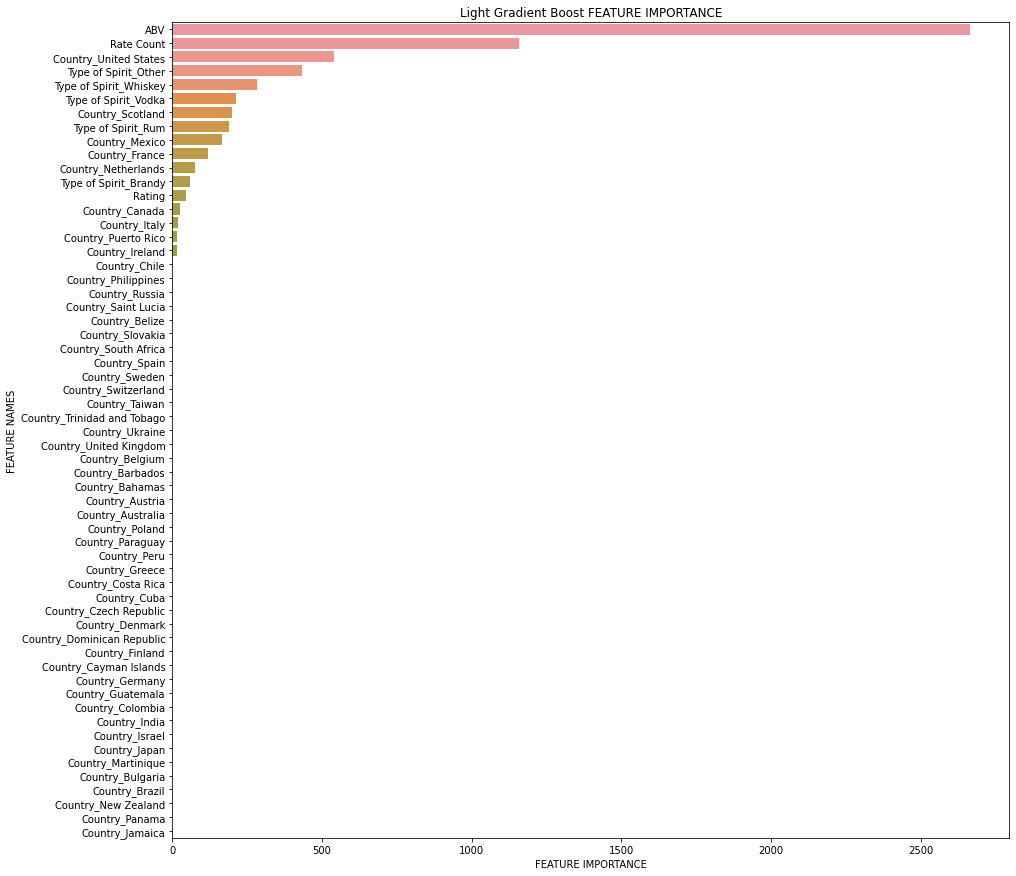

In [ ]:
model=LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      )
model.fit(x_train,y_train)
plot_feature_importance(model.feature_importances_,x_train.columns,'Light Gradient Boost ')


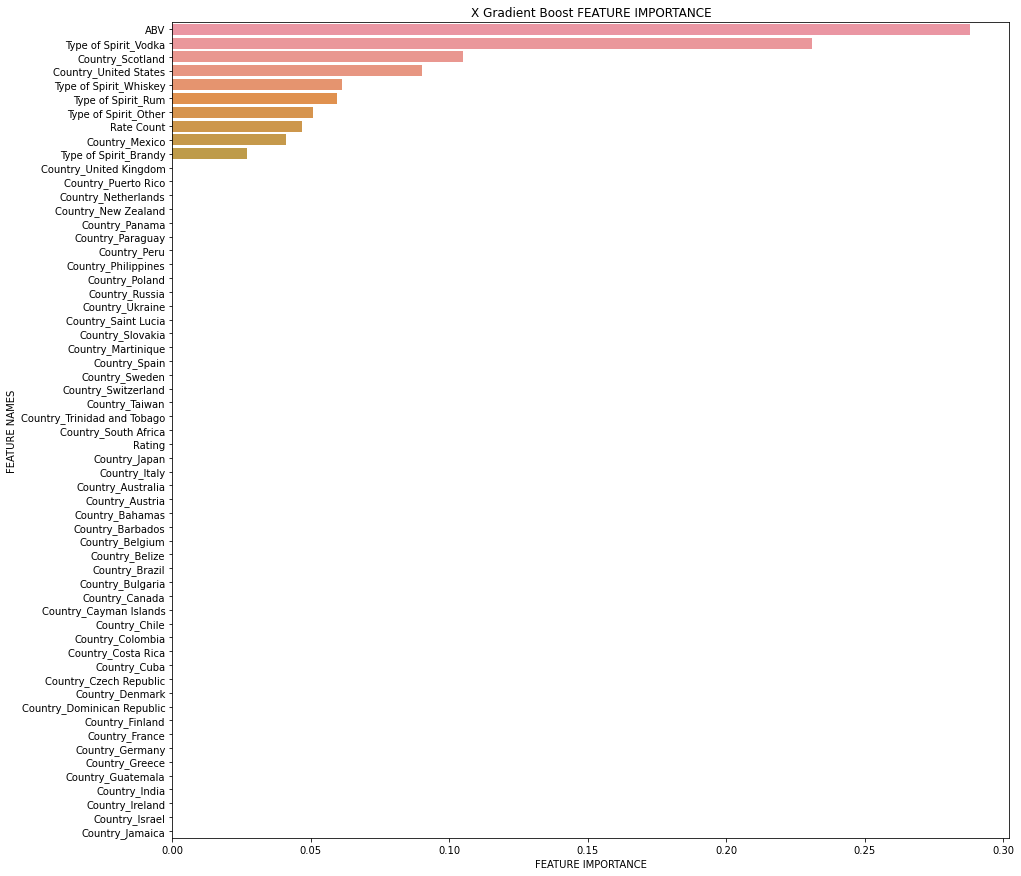

In [ ]:
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(x_train,y_train)
plot_feature_importance(model.feature_importances_,x_train.columns,'X Gradient Boost ')

Text(0, 0.5, 'FEATURE NAMES')

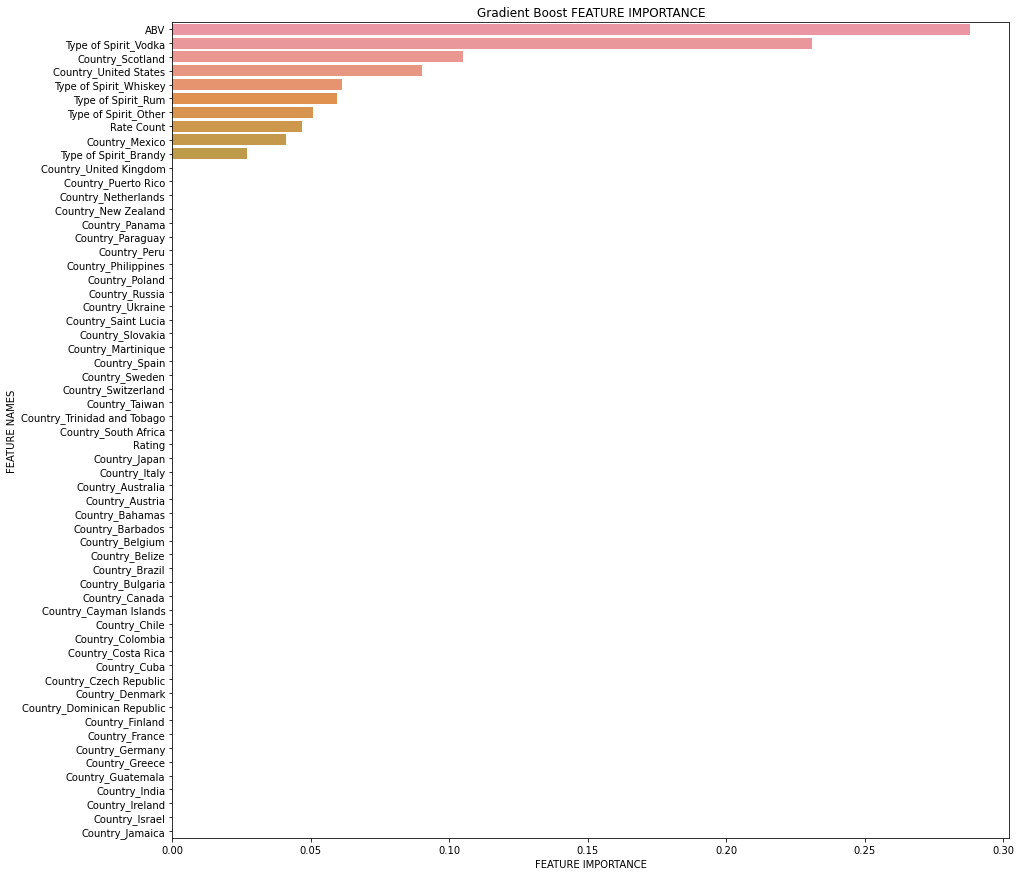

In [ ]:
#Create arrays from feature importance and feature names
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(x_train.columns)

#Create a DataFrame using a Dictionary
data2={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data2)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(15,15))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('Gradient Boost ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [ ]:
list(fi_df["feature_names"])

['ABV',
 'Type of Spirit_Vodka',
 'Country_Scotland',
 'Country_United States',
 'Type of Spirit_Whiskey',
 'Type of Spirit_Rum',
 'Type of Spirit_Other',
 'Rate Count',
 'Country_Mexico',
 'Type of Spirit_Brandy',
 'Country_United Kingdom',
 'Country_Puerto Rico',
 'Country_Netherlands',
 'Country_New Zealand',
 'Country_Panama',
 'Country_Paraguay',
 'Country_Peru',
 'Country_Philippines',
 'Country_Poland',
 'Country_Russia',
 'Country_Ukraine',
 'Country_Saint Lucia',
 'Country_Slovakia',
 'Country_Martinique',
 'Country_Spain',
 'Country_Sweden',
 'Country_Switzerland',
 'Country_Taiwan',
 'Country_Trinidad and Tobago',
 'Country_South Africa',
 'Rating',
 'Country_Japan',
 'Country_Italy',
 'Country_Australia',
 'Country_Austria',
 'Country_Bahamas',
 'Country_Barbados',
 'Country_Belgium',
 'Country_Belize',
 'Country_Brazil',
 'Country_Bulgaria',
 'Country_Canada',
 'Country_Cayman Islands',
 'Country_Chile',
 'Country_Colombia',
 'Country_Costa Rica',
 'Country_Cuba',
 'Countr

In [ ]:
Important_Variables=['ABV',
 'Rate Count',
 'Country_United States',
 'Type of Spirit_Other',
 'Type of Spirit_Whiskey',
 'Type of Spirit_Vodka',
 'Country_Scotland',
 'Type of Spirit_Rum',
 'Country_Mexico',
 'Country_France',
 'Country_Netherlands',
 'Type of Spirit_Brandy']

In [ ]:
for i in list(x_train.columns):
    if i in Important_Variables:
        continue
    else:
        del(x_train[i])
        
        
for i in list(x_test.columns):
    if i in Important_Variables:
        continue
    else:
        del(x_test[i])

In [ ]:
for i in list(x.columns):
    if i in Important_Variables:
        continue
    else:
        del(x[i])

In [ ]:
model=XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

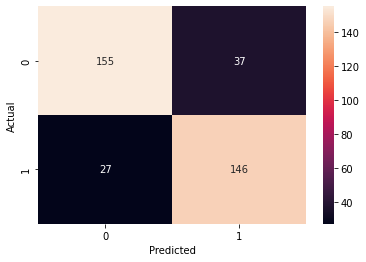

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

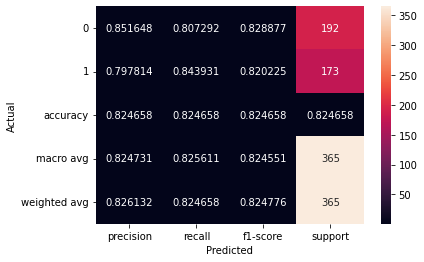

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.851648,0.807292,0.828877,192.000000
1,0.797814,0.843931,0.820225,173.000000
accuracy,0.824658,0.824658,0.824658,0.824658
macro avg,0.824731,0.825611,0.824551,365.000000
weighted avg,0.826132,0.824658,0.824776,365.000000


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 14.4 MB/s 
     |████████████████████████████████| 209 kB 66.0 MB/s 
     |████████████████████████████████| 81 kB 10.3 MB/s 
     |████████████████████████████████| 78 kB 7.3 MB/s 
     |████████████████████████████████| 112 kB 56.8 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 147 kB 73.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=4ee7d6d6566c1f9f9be3fe8db2ad473c1b81abc225f02d7a4e89987acda0ced2
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
from optuna.integration import LightGBMPruningCallback
from sklearn.model_selection import StratifiedKFold

def objective(trial, X, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgbm.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="binary_logloss",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "binary_logloss")
            ],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

In [ ]:
# import optuna
# study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
# func = lambda trial: objective(trial, X, y)
# study.optimize(func, n_trials=200)

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold

In [ ]:
A=list(range(40,70,1))

A=list(range(40,70,1))
params = {} #initialize parameters
params['min_data_in_leaf'] = A
params['num_iterations'] = [10,20,30,40,50,60,70,80,100]
# print(params, iterations)

In [ ]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [ ]:
model=XGBClassifier()
cv=KFold(n_splits=5,shuffle=True)
gsearch = RandomizedSearchCV(model, param_grid,cv=cv,error_score='raise')
results = gsearch.fit(x_train, y_train)
results.best_params_

{'gamma': 0.1,
 'learning_rate': 0.6,
 'max_depth': 12,
 'n_estimators': 130,
 'reg_alpha': 0.1,
 'reg_lambda': 51.2}

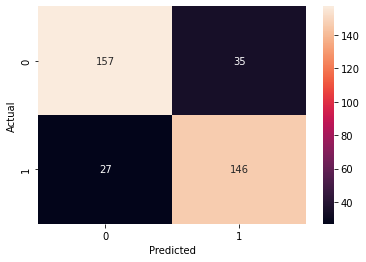

In [ ]:
model=XGBClassifier(gamma= 0.1,learning_rate = 0.6,max_depth = 12,n_estimators = 130, reg_alpha=0.1,reg_lambda = 51.2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.853261,0.817708,0.835106,192.000000
1,0.806630,0.843931,0.824859,173.000000
accuracy,0.830137,0.830137,0.830137,0.830137
macro avg,0.829945,0.830819,0.829983,365.000000
weighted avg,0.831159,0.830137,0.830249,365.000000


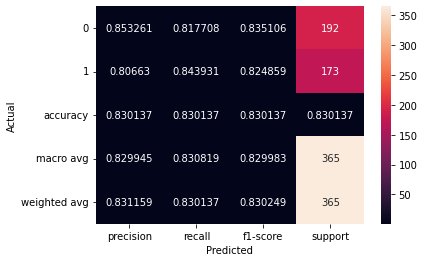

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

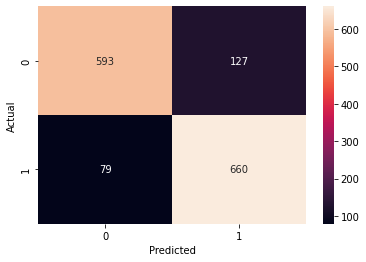

In [ ]:
model=XGBClassifier(gamma= 0.1,learning_rate = 0.6,max_depth = 12,n_estimators = 130, reg_alpha=0.1,reg_lambda = 51.2)
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
report = classification_report(y_train, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.882440,0.823611,0.852011,720.000000
1,0.838628,0.893099,0.865007,739.000000
accuracy,0.858807,0.858807,0.858807,0.858807
macro avg,0.860534,0.858355,0.858509,1459.000000
weighted avg,0.860249,0.858807,0.858594,1459.000000


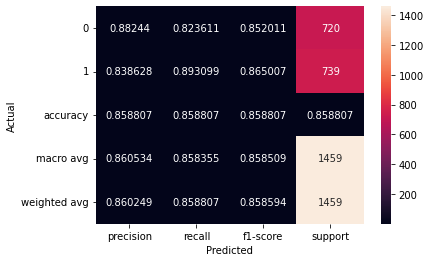

In [ ]:
report = classification_report(y_train, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# PDP Plots

Let us first rename our columns to make it shorter

In [ ]:
# x.columns=['Rate Count',
#  'ABV',
#  'Rating',
#  'Argentina',
#  'Australia',
#  'Canada',
#  'Chile',
#  'France',
#  'Germany',
#  'Israel',
#  'Italy',
#  'New Zealand',
#  'South Africa',
#  'Spain',
#  'United States',
#  'Bordeaux Glass',
#  'Burgundy Glass',
#  'Chardonnay Glass',
#  'Red Glass',
#  'White Glass',
#  '45-50° F',
#  '50-55° F',
#  '55-60° F',
#  '60-65° F',
#  'Dry Wine',
#  'Off-Dry',
#  'Full',
#  'Light',
#  'Medium',
#  'Red Wine',
#  'White Wine']

In [ ]:
clf = XGBClassifier(gamma= 0.1,learning_rate = 0.6,max_depth = 12,n_estimators = 130, reg_alpha=0.1,reg_lambda = 51.2)

from sklearn.ensemble import GradientBoostingClassifier

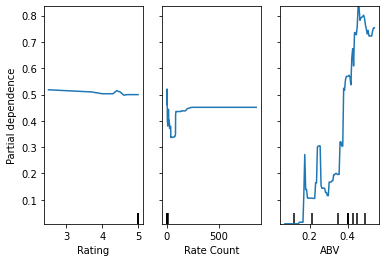

In [ ]:
from sklearn.inspection import PartialDependenceDisplay


clf = XGBClassifier(gamma= 0.1,learning_rate = 0.6,max_depth = 12,n_estimators = 130, reg_alpha=0.1,reg_lambda = 51.2).fit(X, y)
# clf.fit(X, y)
features = [0,1,2]
disp1 = PartialDependenceDisplay.from_estimator(clf, X,features)
# PartialDependenceDisplay.from_estimator(clf, X, features)

/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 0.5000548362731934 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 0.5000548362731934 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 0.5000548362731934 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])


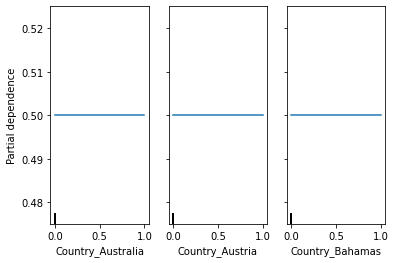

In [ ]:
features = [3,4,5]
PartialDependenceDisplay.from_estimator(clf, X, features)

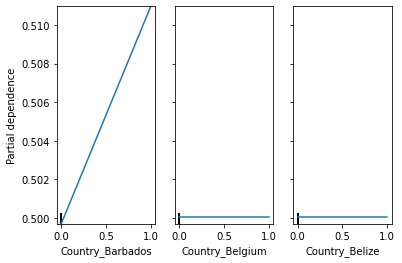

In [ ]:
features = [6,7,8]
PartialDependenceDisplay.from_estimator(clf, X, features)

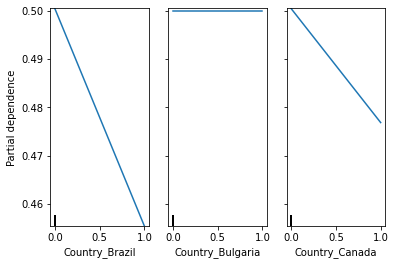

In [ ]:
features = [9,10,11]
PartialDependenceDisplay.from_estimator(clf, X, features)

/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 0.5000548362731934 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 0.5000548362731934 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])
/usr/local/lib/python3.7/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom == top == 0.5000548362731934 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])


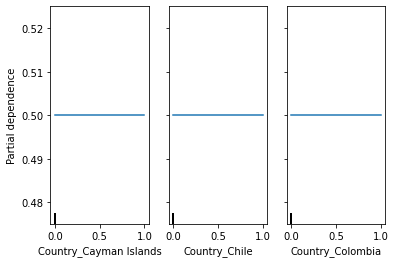

In [ ]:
features = [12,13,14]
PartialDependenceDisplay.from_estimator(clf, X, features)

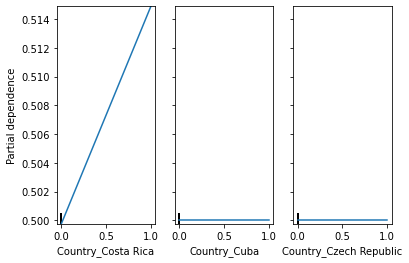

In [ ]:
features = [15,16,17]
PartialDependenceDisplay.from_estimator(clf, X, features)

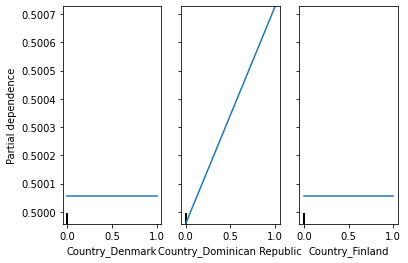

In [ ]:
features = [18,19,20]
PartialDependenceDisplay.from_estimator(clf, X, features)

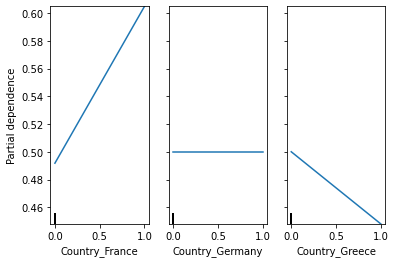

In [ ]:
features = [21,22,23]
PartialDependenceDisplay.from_estimator(clf, X, features)

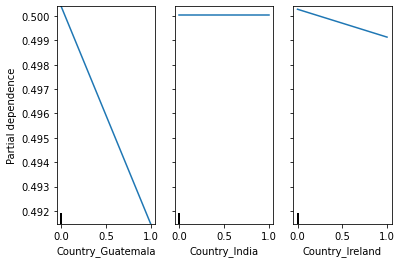

In [ ]:
features = [24,25,26]
PartialDependenceDisplay.from_estimator(clf, X, features)

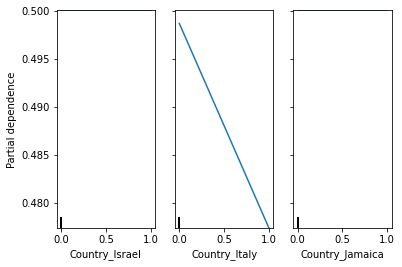

In [ ]:
features = [27,28,29]
PartialDependenceDisplay.from_estimator(clf, X, features)

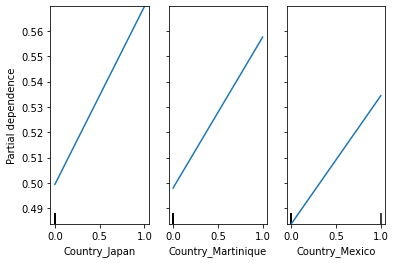

In [ ]:
features = [30,31,32]
PartialDependenceDisplay.from_estimator(clf, X, features)

Preping the data for PCA

In [ ]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import confusion_matrix #confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve #metrics
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.model_selection import GridSearchCV #find best parameter 
from sklearn.ensemble import RandomForestClassifier #ML model
from sklearn.tree import DecisionTreeClassifier #ML model
from sklearn.model_selection import KFold #cross validation by kfold
from prince import PCA
from prince import MCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
# update catcols variable
catcols = check.select_dtypes(['object']).columns

# convert object columns to categorical columns
check[catcols] = check[catcols].astype('category')

In [ ]:
pca_cols = check.select_dtypes(['number']).columns
print(len(pca_cols), 'features used for PCA are', pca_cols.tolist())

5 features used for PCA are ['index', 'Rating', 'Rate Count', 'Price', 'ABV']


In [ ]:
mca_cols = check.select_dtypes(['category']).columns
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())

6 features used for MCA are ['Name', 'Country', 'Brand', 'Tasting Notes', 'Type of Spirit', 'Price_Category']


In [ ]:
# instantiate MCA class
mca = MCA(n_components = 6)

# get principal components
mca = mca.fit(check[mca_cols])

In [ ]:
cat_columns_mca = mca.transform(check[mca_cols])
cat_columns_mca.head()

,0,1,2,3,4,5
0,2.119622,1.005148,0.247875,0.154635,0.459302,0.398614
1,2.120141,1.005133,0.256623,0.156289,0.465327,0.397061
2,2.119080,1.006286,0.254030,0.154551,0.462761,0.395819
3,1.882246,0.780120,0.165944,0.133982,0.400614,0.342632
4,1.188365,0.121819,0.096312,0.257585,0.464131,0.354207


In [ ]:
cols = pd.concat([check[pca_cols], cat_columns_mca],axis=1) 

In [ ]:
cols.head()

,index,Rating,Rate Count,Price,ABV,0,1,2,3,4,5
0,66,4.9,761,15.39,0.40,2.119622,1.005148,0.247875,0.154635,0.459302,0.398614
1,67,4.8,170,23.99,0.40,2.120141,1.005133,0.256623,0.156289,0.465327,0.397061
2,68,4.6,52,14.99,0.40,2.119080,1.006286,0.254030,0.154551,0.462761,0.395819
3,69,5.0,44,23.36,0.35,1.882246,0.780120,0.165944,0.133982,0.400614,0.342632
4,70,4.8,45,19.99,0.13,1.188365,0.121819,0.096312,0.257585,0.464131,0.354207


In [ ]:
ssc=StandardScaler()
mat_ssc=ssc.fit_transform(cols)
mat_ssc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[-1.92148833e+00, -3.38543503e-01,  2.20657034e+01, ...,
         1.84086112e-01,  5.64674227e-01,  4.90431125e-01],
       [-1.92118444e+00, -8.25917892e-01,  4.78483554e+00, ...,
         1.86055649e-01,  5.72082038e-01,  4.88520462e-01],
       [-1.92088055e+00, -1.80066667e+00,  1.33450998e+00, ...,
         1.83986217e-01,  5.68926640e-01,  4.86992885e-01],
       ...,
       [ 1.93521917e+00,  1.48830885e-01, -1.56732424e-01, ...,
         4.58328487e-01, -4.78428543e-01, -1.03147206e-03],
       [ 1.94767879e+00,  1.48830885e-01, -1.56732424e-01, ...,
        -1.84887100e+00,  1.36463458e+01,  1.00366094e+01],
       [ 1.95345276e+00,  1.48830885e-01, -1.27492376e-01, ...,
        -2.69626250e-01,  4.18661311e-01,  2.37096013e-01]])

In [ ]:
cols=pd.DataFrame(mat_ssc)
cols

,0,1,2,3,4,5,6,7,8,9,10
0,-1.921488,-0.338544,22.065703,-0.121243,0.273736,2.390199,1.142851,0.291537,0.184086,0.564674,0.490431
1,-1.921184,-0.825918,4.784836,-0.104790,0.273736,2.390784,1.142833,0.301825,0.186056,0.572082,0.488520
2,-1.920881,-1.800667,1.334510,-0.122008,0.273736,2.389588,1.144144,0.298776,0.183986,0.568927,0.486993
3,-1.920577,0.148831,1.100590,-0.105995,-0.075104,2.122521,0.886994,0.195174,0.159499,0.492522,0.421554
4,-1.920273,-0.825918,1.129830,-0.112442,-1.609999,1.340064,0.138508,0.113277,0.306644,0.570611,0.435795
...,...,...,...,...,...,...,...,...,...,...,...
1819,1.920025,0.148831,-0.156732,-0.116269,0.622576,-0.077519,-0.479262,1.989243,-1.470006,1.906793,1.649378
1820,1.933092,0.148831,-0.156732,-0.097138,0.099316,0.318805,-0.904472,-0.515432,0.188949,0.223905,0.226986
1821,1.935219,0.148831,-0.156732,-0.089485,-0.075104,-0.267390,-0.117436,-0.013904,0.458328,-0.478429,-0.001031
1822,1.947679,0.148831,-0.156732,-0.093598,-0.842552,0.945270,-0.408029,-5.862366,-1.848871,13.646346,10.036609


In [ ]:
#Setup our PCA, n_components control the number of the dimension
pca =PCA(n_components = 2)
#Training and transform our data
pca.fit(cols)
mpg_pca = pca.transform(cols)
mpg_pca.head()

,0,1
0,0.637594,9.328190
1,0.391851,3.222502
2,0.322882,2.408201
3,0.119358,1.519883
4,-0.919237,2.289572


In [ ]:
cols

,0,1,2,3,4,5,6,7,8,9,10
0,-1.921488,-0.338544,22.065703,-0.121243,0.273736,2.390199,1.142851,0.291537,0.184086,0.564674,0.490431
1,-1.921184,-0.825918,4.784836,-0.104790,0.273736,2.390784,1.142833,0.301825,0.186056,0.572082,0.488520
2,-1.920881,-1.800667,1.334510,-0.122008,0.273736,2.389588,1.144144,0.298776,0.183986,0.568927,0.486993
3,-1.920577,0.148831,1.100590,-0.105995,-0.075104,2.122521,0.886994,0.195174,0.159499,0.492522,0.421554
4,-1.920273,-0.825918,1.129830,-0.112442,-1.609999,1.340064,0.138508,0.113277,0.306644,0.570611,0.435795
...,...,...,...,...,...,...,...,...,...,...,...
1819,1.920025,0.148831,-0.156732,-0.116269,0.622576,-0.077519,-0.479262,1.989243,-1.470006,1.906793,1.649378
1820,1.933092,0.148831,-0.156732,-0.097138,0.099316,0.318805,-0.904472,-0.515432,0.188949,0.223905,0.226986
1821,1.935219,0.148831,-0.156732,-0.089485,-0.075104,-0.267390,-0.117436,-0.013904,0.458328,-0.478429,-0.001031
1822,1.947679,0.148831,-0.156732,-0.093598,-0.842552,0.945270,-0.408029,-5.862366,-1.848871,13.646346,10.036609


(-5.0, 15.0)

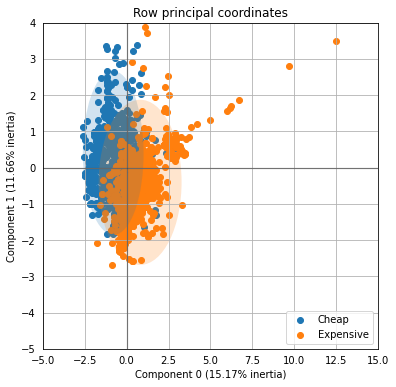

In [ ]:
Price = check['Price_Category']
ax = pca.plot_row_coordinates(cols, color_labels=Price)
plt.ylim(-5,4)
plt.xlim(-5,15)

In [ ]:
pca.explained_inertia_

array([0.15170746, 0.11659371])